<a href="https://colab.research.google.com/github/muniappabalaji/TimeSeries/blob/main/Multi_Variate_Time_Series_Recap_October2025_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Approach to Panama Electricity Forecast
1. Load the libraries and Data
2. Audit Check on the data
3. EDA
4. Time Series Decomposition
5. Stationarity
6. VAR
7. VECM
8. VARMA
9. Compare the results of VAR, VECM and VARMA
10. Apply Neural Networks to the data
11. Compare the results of VAR, VECM and VARMA with Neural Networks
12. Deploy the model with best results

Unzip The Data

In [ ]:
!unzip '/content/Panama Electricity Data.zip'

Archive:  /content/Panama Electricity Data.zip
replace Predict_Jan.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Predict_Jan.csv         
  inflating: Test_Jan.csv            
  inflating: train.csv               


# Import Data and EDA

Load the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

Load the data

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
display(df.head())
display(df.info())
display(df.describe())

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43775 entries, 0 to 43774
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    43775 non-null  object 
 1   nat_demand  43775 non-null  float64
 2   T2M_toc     43775 non-null  float64
 3   QV2M_toc    43775 non-null  float64
 4   TQL_toc     43775 non-null  float64
 5   W2M_toc     43775 non-null  float64
 6   T2M_san     43775 non-null  float64
 7   QV2M_san    43775 non-null  float64
 8   TQL_san     43775 non-null  float64
 9   W2M_san     43775 non-null  float64
 10  T2M_dav     43775 non-null  float64
 11  QV2M_dav    43775 non-null  float64
 12  TQL_dav     43775 non-null  float64
 13  W2M_dav     43775 non-null  float64
 14  Holiday_ID  43775 non-null  int64  
 15  holiday     43775 non-null  int64  
 16  school      43775 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 5.7+ MB


None

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000,43775.000000
mean,1184.102195,27.381070,0.018372,0.082358,13.018476,26.869752,0.017909,0.109571,6.934124,24.678938,0.016912,0.148480,3.562928,0.730828,0.062501,0.739600
std,193.512875,1.652179,0.001587,0.065835,7.151448,2.960669,0.001853,0.086249,4.055238,2.374089,0.001566,0.088259,1.709116,3.244740,0.242067,0.438858
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010385,0.000009,0.060431,19.933740,0.009655,0.000051,0.015497,0.000000,0.000000,0.000000
25%,1017.453350,26.168436,0.017337,0.028423,7.387169,24.767938,0.016707,0.040314,3.912895,22.951654,0.015867,0.079285,2.301747,0.000000,0.000000,0.000000
50%,1173.251500,27.109338,0.018670,0.068237,11.767408,26.141260,0.018418,0.089752,5.888003,23.981989,0.017224,0.134277,3.408653,0.000000,0.000000,1.000000
75%,1332.279950,28.521463,0.019549,0.120148,18.038599,28.642450,0.019265,0.161377,9.151058,26.174570,0.018092,0.204773,4.652970,0.000000,0.000000,1.000000
max,1721.515700,35.039575,0.022690,0.521240,39.229726,39.063440,0.022011,0.484985,24.483937,34.216211,0.020958,0.477783,10.288902,22.000000,1.000000,1.000000


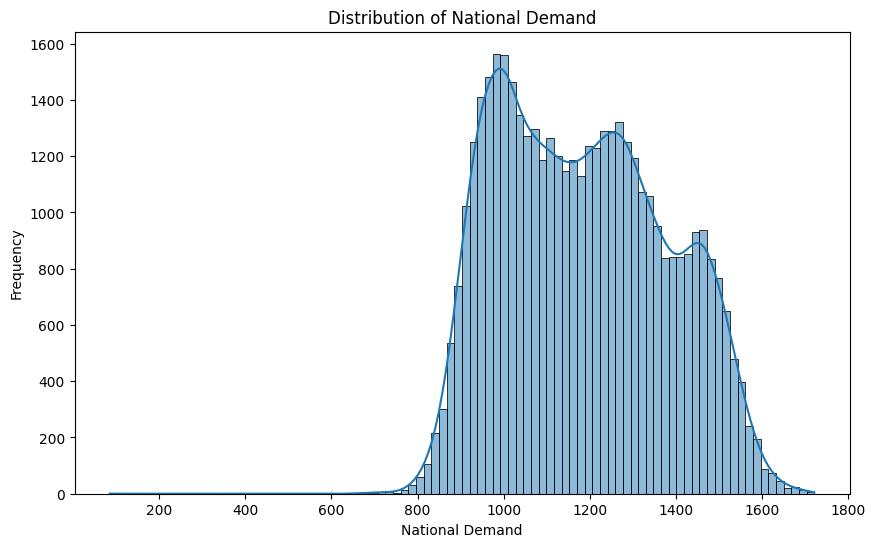

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['nat_demand'], kde=True)
plt.title('Distribution of National Demand')
plt.xlabel('National Demand')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#sns.pairplot(df)

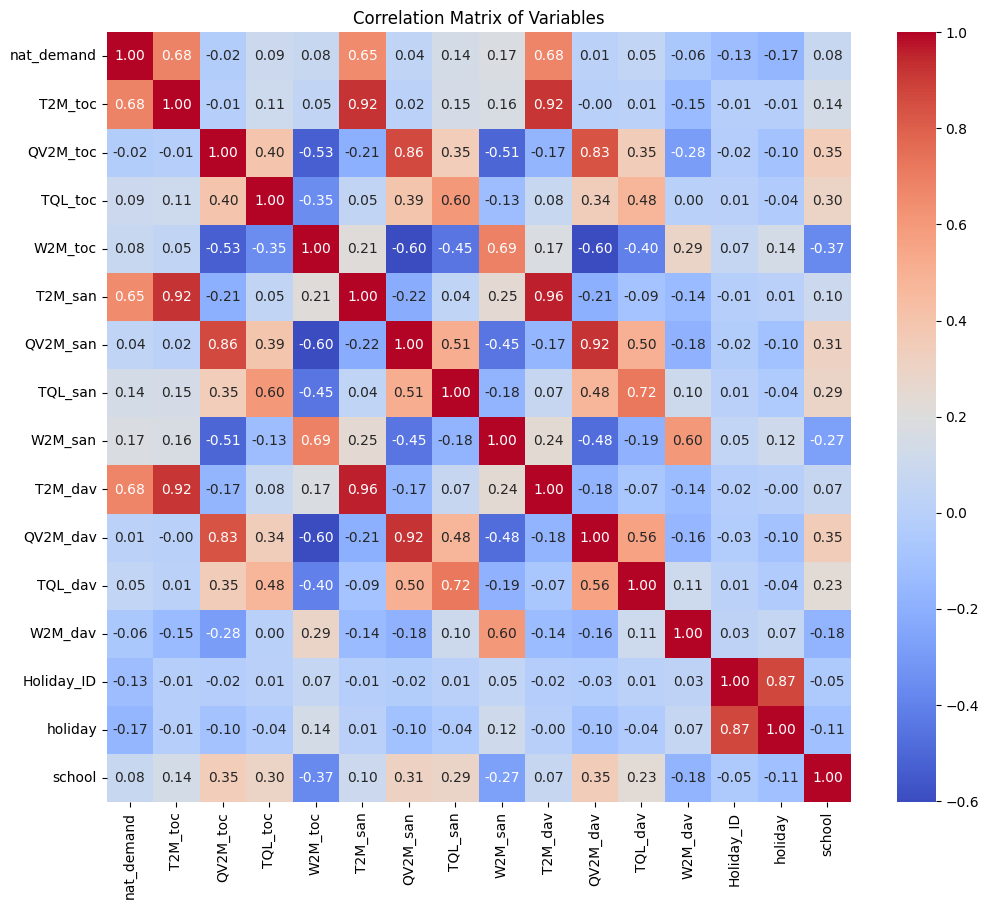

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M')
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('datetime', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

Plot the national demand

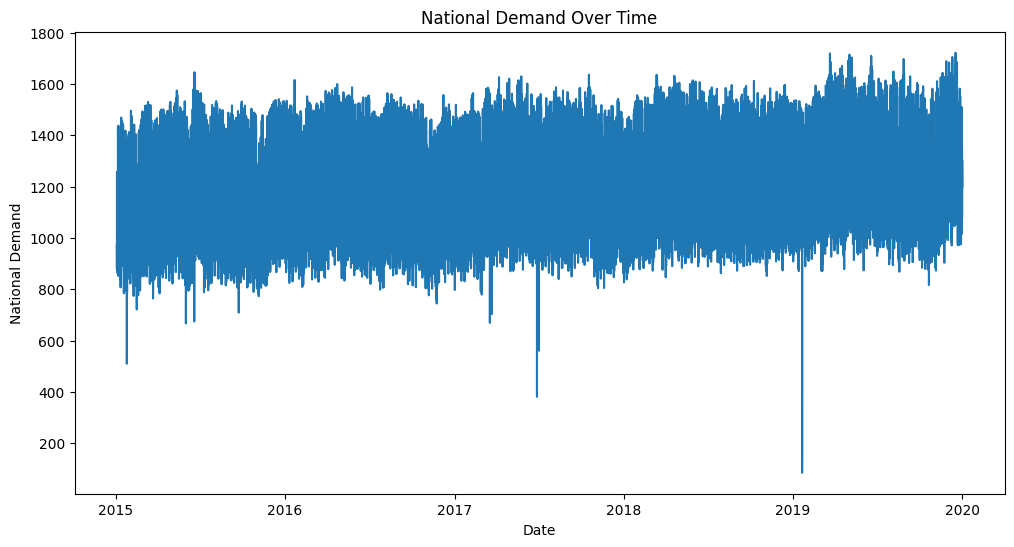

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['nat_demand'])
plt.title('National Demand Over Time')
plt.xlabel('Date')
plt.ylabel('National Demand')
plt.show()

# Time Series Decomposition

Date Time Object and Set Datetime as Index

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M')
df = df.set_index('datetime')
display(df.head())

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


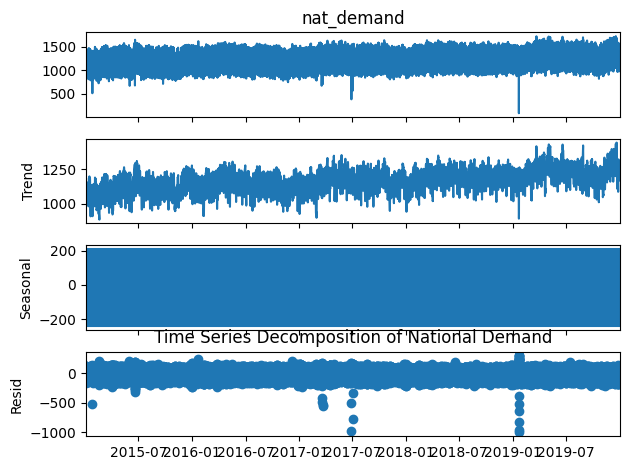

In [ ]:
decomposition = seasonal_decompose(df['nat_demand'], model='additive')
decomposition.plot()
plt.title('Time Series Decomposition of National Demand')
plt.show()

Check Stationarity on Data

In [ ]:
from statsmodels.tsa.stattools import adfuller

- Null Hypotheses: Data is non stationary. No Unit Root
- Alternate Hypotheses: Data is Stationary. Unit Root

In [ ]:
dftest = adfuller(df['nat_demand'])
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])

ADF Statistic: -21.344772773557136
p-value: 0.0


Based on the ADFuller Test the Data is Stationary

# Vector Auto Regressive Model

Divide the data into Training & Testing

In [ ]:
# Define the split point (e.g., 80% for training, 20% for testing)
train_size = int(len(df) * 0.8)
train_data, test_data = df[0:train_size], df[train_size:]

print('Training data shape:', train_data.shape)
print('Testing data shape:', test_data.shape)

Training data shape: (35020, 16)
Testing data shape: (8755, 16)


Apply the Vector Auto Regressive Model and Evaluate the Model using MAPE and RMSE

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
max_p = 10
for i in range(1, max_p+1):
  model = VAR(train_data)
  results = model.fit(i)
  aic = results.aic
  print(f"Lag: {i}, AIC: {aic}")

Lag: 1, AIC: -93.75868484890327
Lag: 2, AIC: -102.80229799079393
Lag: 3, AIC: -104.37576980777354
Lag: 4, AIC: -104.56989338073927
Lag: 5, AIC: -104.69270297447042
Lag: 6, AIC: -104.77047092269234
Lag: 7, AIC: -104.82892921815065
Lag: 8, AIC: -104.90024240516017
Lag: 9, AIC: -105.00050904195817
Lag: 10, AIC: -105.12079591853956


In [ ]:
model_fitted = VAR(train_data).fit(1)
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Oct, 2025
Time:                     04:20:50
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                   -93.6929
Nobs:                     35019.0    HQIC:                  -93.7377
Log likelihood:           846903.    FPE:                1.91038e-41
AIC:                     -93.7587    Det(Omega_mle):     1.89561e-41
--------------------------------------------------------------------
Results for equation nat_demand
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const               203.821221         8.700449           23.427           0.000
L1.nat_demand         0.938679         0.002338          401.443           0.000
L1.T2M_toc           -2.562799         0.625266        

Forecast on the test data and evaluate using RMSE and MAPE

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make forecast
lag_order = model_fitted.k_ar
forecast_input = train_data.values[-lag_order:]
forecast = model_fitted.forecast(y=forecast_input, steps=len(test_data))
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Calculate RMSE for 'nat_demand'
rmse = sqrt(mean_squared_error(test_data['nat_demand'], forecast_df['nat_demand']))
print('RMSE:', rmse)

# Calculate MAPE for 'nat_demand'
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['nat_demand'], forecast_df['nat_demand'])
print('MAPE:', mape)

RMSE: 203.83439503188475
MAPE: 13.158437258097386


# Vector Error Correction Model

Cointegration Test

In [ ]:
df.columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

In [ ]:
from statsmodels.tsa.stattools import coint
selected_vars = df[['nat_demand', 'T2M_toc', 'QV2M_toc']]
display(selected_vars.head())

,nat_demand,T2M_toc,QV2M_toc
datetime,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576
2015-01-03 02:00:00,912.1755,25.899255,0.018653
2015-01-03 03:00:00,900.2688,25.937280,0.018768
2015-01-03 04:00:00,889.9538,25.957544,0.018890
2015-01-03 05:00:00,893.6865,25.973840,0.018981


- Null Hypothesis: Cointegration does not exist
- Alternate Hypothesis: Cointegration Exists

In [ ]:
coint_result = coint(selected_vars['nat_demand'], selected_vars['T2M_toc'])
print('Cointegration Test Results:')
print('Cointegration Statistic:', coint_result[0])
print('p-value:', coint_result[1])

Cointegration Test Results:
Cointegration Statistic: -19.20825661972982
p-value: 0.0


In [ ]:
coint_result = coint(selected_vars['nat_demand'], selected_vars['QV2M_toc'])
print('Cointegration Test Results:')
print('Cointegration Statistic:', coint_result[0])
print('p-value:', coint_result[1])

Cointegration Test Results:
Cointegration Statistic: -21.219807267157947
p-value: 0.0


P values is less than 0.05 indicating that we accept the alternate hypothesis of cointegration existing


In [ ]:
train_size_selected = int(len(selected_vars) * 0.8)
train_data_selected, test_data_selected = selected_vars[0:train_size_selected], selected_vars[train_size_selected:]

print('Training data shape (selected variables):', train_data_selected.shape)
print('Testing data shape (selected variables):', test_data_selected.shape)

Training data shape (selected variables): (35020, 3)
Testing data shape (selected variables): (8755, 3)


In [ ]:
from statsmodels.tsa.vector_ar.vecm import select_order

In [ ]:
vecm_order_results = select_order(train_data_selected, maxlags=10, deterministic='ci')
print(vecm_order_results.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -11.20      -11.20   1.367e-05      -11.20
1       -13.91      -13.90   9.114e-07      -13.91
2       -14.09      -14.08   7.617e-07      -14.09
3       -14.15      -14.14   7.145e-07      -14.15
4       -14.17      -14.16   6.988e-07      -14.17
5       -14.23      -14.22   6.608e-07      -14.23
6       -14.27      -14.25   6.373e-07      -14.26
7       -14.31      -14.29   6.124e-07      -14.30
8       -14.34      -14.32   5.912e-07      -14.33
9       -14.39      -14.37   5.618e-07      -14.38
10     -14.46*     -14.44*  5.235e-07*     -14.45*
--------------------------------------------------


Apply VECM models for 10 lags

In [ ]:
#from statsmodels.tsa.vector_ar.vecm import VECM
#vecm_model = VECM(train_data_selected, k_ar_diff=11, deterministic='ci')
#vecm_results = vecm_model.fit()

# VARMA

Divide the selected variables data into Training & Testing

In [ ]:
# Define the split point (e.g., 80% for training, 20% for testing)
train_size_selected_varma = int(len(selected_vars) * 0.8)
train_data_selected_varma, test_data_selected_varma = selected_vars[0:train_size_selected_varma], selected_vars[train_size_selected_varma:]

print('Training data shape (selected variables for VARMA):', train_data_selected_varma.shape)
print('Testing data shape (selected variables for VARMA):', test_data_selected_varma.shape)

Training data shape (selected variables for VARMA): (35020, 3)
Testing data shape (selected variables for VARMA): (8755, 3)


Determine the optimal order for the VARMA model using the selected variables

In [ ]:
# Determine VARMA order (p,q) using BIC
import warnings
warnings.filterwarnings("ignore")

best_bic_varma = float('inf')
best_order_varma = (0, 0)
max_lag_varma = 2 # Restrict search for demonstration

for p in range(max_lag_varma + 1):
    for q in range(max_lag_varma + 1):
        if p == 0 and q == 0:
            continue
        try:
            model_varma_order = VARMAX(train_data_selected_varma, order=(p, q), enforce_stationarity=False, enforce_invertibility=False)
            results_varma_order = model_varma_order.fit(disp=False)
            if results_varma_order.bic < best_bic_varma:
                best_bic_varma = results_varma_order.bic
                best_order_varma = (p, q)
            print(f"Order ({p},{q}): BIC = {results_varma_order.bic}")
        except:
            continue

print(f"\nBest VARMA Order (p,q) based on BIC: {best_order_varma}")


Best VARMA Order (p,q) based on BIC: (0, 0)


Apply the VARMA model with the selected order

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
# Apply VARMA model
varma_model = VARMAX(train_data_selected_varma, order=(1,1), enforce_stationarity=False, enforce_invertibility=False)
varma_results = varma_model.fit(disp=False)
print(varma_results.summary())

                                     Statespace Model Results                                    
Dep. Variable:     ['nat_demand', 'T2M_toc', 'QV2M_toc']   No. Observations:                35020
Model:                                        VARMA(1,1)   Log Likelihood               66827.194
                                             + intercept   AIC                        -133600.388
Date:                                   Sun, 26 Oct 2025   BIC                        -133371.869
Time:                                           04:26:05   HQIC                       -133527.601
Sample:                                       01-03-2015                                         
                                            - 01-01-2019                                         
Covariance Type:                                     opg                                         
Ljung-Box (L1) (Q):     1081.82, 1293.59, 236.35   Jarque-Bera (JB):   817869.92, 112628.01, 52783.24
Prob(Q):        

Forecast on the test data and evaluate using RMSE and MAPE

In [ ]:
# Make forecast
varma_forecast = varma_results.forecast(steps=len(test_data_selected_varma))
varma_forecast_df = pd.DataFrame(varma_forecast, index=test_data_selected_varma.index, columns=test_data_selected_varma.columns)

# Calculate RMSE for 'nat_demand'
rmse_varma = sqrt(mean_squared_error(test_data_selected_varma['nat_demand'], varma_forecast_df['nat_demand']))
print('VARMA RMSE:', rmse_varma)

# Calculate MAPE for 'nat_demand'
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_varma = mean_absolute_percentage_error(test_data_selected_varma['nat_demand'], varma_forecast_df['nat_demand'])
print('VARMA MAPE:', mape_varma)

VARMA RMSE: 203.1494476726697
VARMA MAPE: 13.152390271990766


# Recurrent Neural Network

Recurrent Neural Network

In [ ]:
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential

In [ ]:
# Prepare data for RNN
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['nat_demand'].values.reshape(-1, 1))

# Create sequences
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 24 # Using 24 hours as look back
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into train and test sets
train_size_rnn = int(len(X) * 0.8)
test_size_rnn = len(X) - train_size_rnn
train_X_rnn, test_X_rnn = X[0:train_size_rnn,:], X[0:test_size_rnn,:]
train_y_rnn, test_y_rnn = y[0:train_size_rnn], y[0:test_size_rnn]

print('Training data shape (RNN):', train_X_rnn.shape, train_y_rnn.shape)
print('Testing data shape (RNN):', test_X_rnn.shape, test_y_rnn.shape)

Training data shape (RNN): (35000, 24, 1) (35000,)
Testing data shape (RNN): (8750, 24, 1) (8750,)


In [ ]:
train_y_rnn

array([0.52487375, 0.51550134, 0.50379051, ..., 0.50681546, 0.5030024 ,
       0.53370453])

In [ ]:
# Build and train the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(look_back, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(train_X_rnn, train_y_rnn, epochs=1, batch_size=1, verbose=2) # Reduced epochs for demonstration

35000/35000 - 159s - 5ms/step - loss: 9.6503e-04


In [ ]:
model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,955 (31.08 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,304 (20.72 KB)

In [ ]:
# Make predictions
rnn_forecast = model_rnn.predict(test_X_rnn)

# Inverse scale the predictions
rnn_forecast = scaler.inverse_transform(rnn_forecast)

# Inverse scale the actual values
test_y_rnn_inv = scaler.inverse_transform([test_y_rnn])

# Calculate RMSE
rmse_rnn = sqrt(mean_squared_error(test_y_rnn_inv[0], rnn_forecast[:,0]))
print('RNN RMSE:', rmse_rnn)

# Calculate MAPE
mape_rnn = np.mean(np.abs((test_y_rnn_inv[0] - rnn_forecast[:,0]) / test_y_rnn_inv[0])) * 100
print('RNN MAPE:', mape_rnn)

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RNN RMSE: 42.32794022446713
RNN MAPE: 3.0535878706556265


# LSTM

In [ ]:
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(look_back, 1)))
model_lstm.add(Dense(1)) # Assuming Dense layer is already imported from the RNN section
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_lstm.fit(train_X_rnn, train_y_rnn, epochs=1, batch_size=1, verbose=2) # Reduced epochs for demonstration

# Make predictions
lstm_forecast = model_lstm.predict(test_X_rnn)

# Inverse scale the predictions
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Inverse scale the actual values (using the previously inverse scaled test_y_rnn_inv)
# If test_y_rnn_inv is not available, you would inverse scale test_y_rnn here again:
# test_y_rnn_inv = scaler.inverse_transform([test_y_rnn])


# Calculate RMSE
rmse_lstm = sqrt(mean_squared_error(test_y_rnn_inv[0], lstm_forecast[:,0]))
print('LSTM RMSE:', rmse_lstm)

# Calculate MAPE
mape_lstm = np.mean(np.abs((test_y_rnn_inv[0] - lstm_forecast[:,0]) / test_y_rnn_inv[0])) * 100
print('LSTM MAPE:', mape_lstm)

35000/35000 - 237s - 7ms/step - loss: 0.0011
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM RMSE: 38.779474887653016
LSTM MAPE: 2.685645730386591


In [ ]:
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

In [ ]:
model_lstm.save('time_series_final_model.keras')

In [ ]:
import pickle

# Define the filename for the pickled model
filename = 'varma_model.pkl'

# Open the file in write binary mode and pickle the model
with open(filename, 'wb') as f:
    pickle.dump(varma_results, f)

print(f"VARMA model successfully pickled to {filename}")

VARMA model successfully pickled to varma_model.pkl
